<h1>Neural Net and Deep Learning-SVHN Project</h1>

---



# Importing Keras Modules


In [2]:
#Importing important modules
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU

from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import os
os.chdir('/gdrive/My Drive/IN CLASS')


# Loading the Dataset

<h3>Load SVHN dataset from a h5 file</h3>

In [0]:
import h5py
import numpy as np

# Open the file as readonly. The file should be present inside a directory called "data" in the same folder as code
h5f = h5py.File('Copy of SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()


In [6]:
x_train.shape

(42000, 32, 32)

In [7]:
x_test.shape

(18000, 32, 32)

In [8]:
print(x_train.dtype)

float32


In [9]:
print(y_train.dtype)

uint8


<h3>Pre-processing the dataset</h3>
<h4>Normalizing the input</h4>

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the input
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (42000, 32, 32)
42000 train samples
18000 test samples


In [11]:
x_train.shape[0]

42000

In [0]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1).astype('float32')

In [0]:
batch_size = 128
num_classes = 10
epochs = 10

In [14]:
print(y_train[0])

2


<h4>Convert Labels from digits to one hot vectors</h4>

In [0]:
import keras
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [16]:
print(y_test[919])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [0]:

#Initialize the model
model = Sequential()

model.add(Dense(784,activation='relu'))
#Apply Dropout with 0.5 probability 
#model.add(Dropout(0.5,name='drop_1'))

model.add(Dense(100,activation='relu'))
#Apply Dropout with 0.25 probability 
#model.add(Dropout(0.25,name='drop_2'))

model.add(Dense(128,activation='relu'))
#Apply Dropout with 0.5 probability 
#model.add(Dropout(0.5,name='drop_3'))


model.add(Dense(256,activation='relu'))
#Apply Dropout with 0.5 probability 
#model.add(Dropout(0.5,name='drop_4'))

model.add(Dense(512,activation='relu'))
keras.layers.BatchNormalization(axis=-1, momentum=0.90, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

#Apply Dropout with 0.5 probability 
#model.add(Dropout(0.5,name='drop_1'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])


In [42]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 31s 733us/step - loss: 2.3026 - acc: 0.1006 - val_loss: 2.3024 - val_acc: 0.1122
Epoch 2/10
42000/42000 [==============================] - 30s 704us/step - loss: 2.3022 - acc: 0.1054 - val_loss: 2.3022 - val_acc: 0.1047
Epoch 3/10
42000/42000 [==============================] - 30s 709us/step - loss: 2.3019 - acc: 0.1062 - val_loss: 2.3019 - val_acc: 0.1078
Epoch 4/10
42000/42000 [==============================] - 30s 704us/step - loss: 2.3014 - acc: 0.1210 - val_loss: 2.3016 - val_acc: 0.0987
Epoch 5/10
42000/42000 [==============================] - 30s 704us/step - loss: 2.3008 - acc: 0.1255 - val_loss: 2.3009 - val_acc: 0.1127
Epoch 6/10
42000/42000 [==============================] - 30s 704us/step - loss: 2.3000 - acc: 0.1376 - val_loss: 2.2998 - val_acc: 0.1217
Epoch 7/10
42000/42000 [==============================] - 30s 710us/step - loss: 2.2986 - acc: 0.1492 - val_loss: 2.

In [43]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 32, 32, 784)       1568      
_________________________________________________________________
dense_53 (Dense)             (None, 32, 32, 100)       78500     
_________________________________________________________________
dense_54 (Dense)             (None, 32, 32, 128)       12928     
_________________________________________________________________
dense_55 (Dense)             (None, 32, 32, 256)       33024     
_________________________________________________________________
dense_56 (Dense)             (None, 32, 32, 512)       131584    
_________________________________________________________________
flatten_8 (Flatten)          (None, 524288)            0         
_________________________________________________________________
dense_57 (Dense)             (None, 10)              

<h4>Fit the model to the SVHN dataset</h4>

# Classification Accuracy

[link text](https:// [link text](https://))<h4>Evaluate trained model on the test set</h4>

In [44]:
#Testing the model on test set
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

18000/18000 [==============================] - 6s 349us/step
Test loss: 2.2845989276038274
Test accuracy: 0.17472222222222222


<h4>Visualizing some predictions</h4>

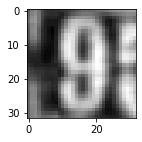

1


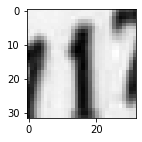

0


In [45]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(x_test[3].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[3].reshape(1,32,32,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[8800].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[800].reshape(1,32,32,1))))


